In [6]:
import io
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dropout, MaxPooling2D, Conv2D, Dense
from keras.datasets import cifar10
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage.color import rgb2grey
%matplotlib inline
print('Done Importing....')

Done Importing....


In [7]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 204s 1us/step


In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [10]:
X = np.vstack((X_train,X_test))
y = np.vstack((y_train,y_test))

In [11]:
y = y.flatten()
X.shape, y.shape
ind = [i for i,j in enumerate(y) if j == 2]
print('done')

done


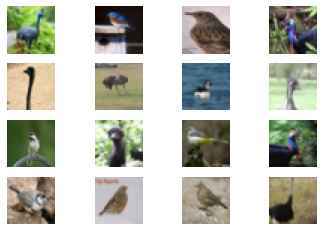

In [12]:
X = X[ind]
y = y[ind]

for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

In [13]:
X.shape, y.shape
X = X.reshape((6144000,3))

X.shape

(6144000, 3)

In [14]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans = kmeans.fit(X)

kmeans.cluster_centers_

array([[157.37939434, 156.7029204 , 137.04363108],
       [110.2067876 , 109.84866674,  83.86785863],
       [ 49.89077093,  50.85047093,  39.16259887],
       [207.20931677, 212.57730015, 212.46908181]])

In [15]:
X_new = X

X.shape

(6144000, 3)

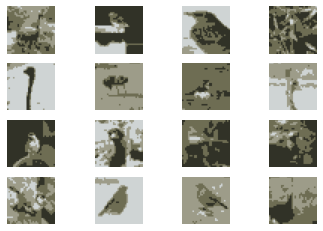

In [16]:
for i in range(len(X)):
    X_new[i] = kmeans.cluster_centers_[kmeans.labels_[i]]
    
X_viz = X_new.reshape((6000,32,32,3))
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_viz[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show() 

In [20]:
y_N = keras.utils.to_categorical(kmeans.labels_).reshape((6000,32,32,4))
X = X.reshape((6000,32,32,3))

X_N = []
for i in range(len(X)):
    X_N.append(rgb2grey(X[i]).tolist())

X_N = np.array(X_N)
print('done')

<ipython-input-20-b7db88b7696e>:6: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  X_N.append(rgb2grey(X[i]).tolist())


done


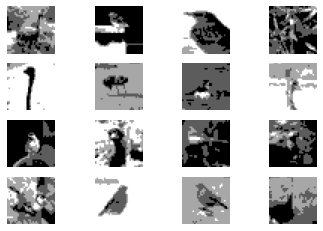

In [21]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_N[i]
    axis.imshow(arr,cmap='gray')
    plt.axis('off')
plt.show()

In [22]:
X_N = X_N.reshape((6000,32,32,1))

X_N.shape, y_N.shape

((6000, 32, 32, 1), (6000, 32, 32, 4))

In [23]:
X_train = X_N[0:5984]
y_train = y_N[0:5984]
X_test = X_N[-16:]
y_test = y_N[-16:]

In [24]:
X_train = np.vstack((X_train,X_test))
y_train = np.vstack((y_train,y_test))
print('s')

s


In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6000, 32, 32, 1), (6000, 32, 32, 4), (16, 32, 32, 1), (16, 32, 32, 4))

In [26]:
cnn = Sequential()
cnn.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1), padding='same', input_shape = (32,32,1)))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
cnn.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1), padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
cnn.add(Dense(32, activation='softmax'))
cnn.add(Dense(4, activation='softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dense (Dense)                (None, 32, 32, 32)        2080      
_________________________________________________________________
dense_1 (Dense)              (None, 32, 32, 4)         132       
Total params: 106,340
Trainable params: 106,340
Non-trainable params: 0
__________________________________________________

Epoch 1/10
169/169 [==============================] - 66s 380ms/step - loss: 1.3818 - accuracy: 0.2956 - val_loss: 1.3642 - val_accuracy: 0.3353
Epoch 2/10
169/169 [==============================] - 65s 386ms/step - loss: 1.3591 - accuracy: 0.3357 - val_loss: 1.3535 - val_accuracy: 0.3353
Epoch 3/10
169/169 [==============================] - 65s 387ms/step - loss: 1.3456 - accuracy: 0.3445 - val_loss: 1.3487 - val_accuracy: 0.3353
Epoch 4/10
169/169 [==============================] - 61s 359ms/step - loss: 1.3423 - accuracy: 0.3401 - val_loss: 1.3461 - val_accuracy: 0.3353
Epoch 5/10
169/169 [==============================] - 61s 361ms/step - loss: 1.3443 - accuracy: 0.3368 - val_loss: 1.3442 - val_accuracy: 0.3353
Epoch 6/10
169/169 [==============================] - 61s 359ms/step - loss: 1.3352 - accuracy: 0.3467 - val_loss: 1.3423 - val_accuracy: 0.3353
Epoch 7/10
169/169 [==============================] - 62s 366ms/step - loss: 1.3318 - accuracy: 0.3442 - val_loss: 1.3395 - val_ac

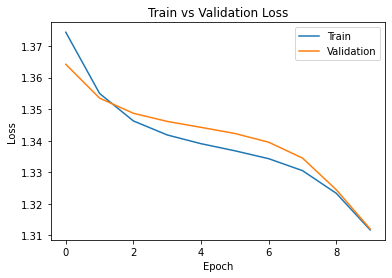

In [27]:
cnn.compile(loss='categorical_crossentropy', optimizer='sgd', metrics = ['accuracy'])
history = cnn.fit(X_train, y_train, epochs=10, validation_split=0.1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [28]:
predictions = cnn.predict(X_test)
predictions.shape
predictions = predictions.reshape((16384,4))
pred = predictions[:,0:3]
for i in range(len(predictions)):
    pred[i] = kmeans.cluster_centers_[np.argmax(predictions[i])].tolist()
    
pred = pred.reshape((16,32,32,3))

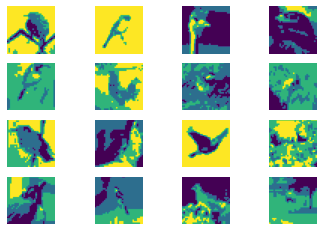

In [29]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_test.reshape(16,32,32)[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

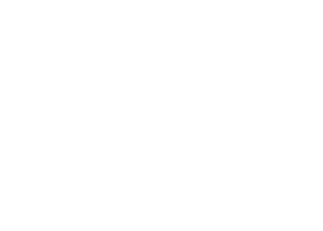

In [30]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = pred[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()